In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

In [5]:
KEcolor = '#267FE3'
PEcolor = '#FF336C'
Botcolor = '#3DBF19'
Buoycolor = '#B65AFE'
Windcolor = '#FFA433'
Rescolor = 'grey'

# Load data

In [6]:
datadir = '/g/data/v45/pm2987/SpecTransfers_Tvar/atm/'
dataname = '_atm_Tvar_17Mar2020_'

w = np.load('../Function_codes/spectral_transfer_git/freq_output_from_code.npy')/365 #100 years
#w = (1/183) * np.arange(183)
dw = w[100] - w[99]

# Full-domain ocean Tvar

# First 100 years -------------------------------------------
yrs = '34_133'
vrt_1 = np.load(datadir+'vert_adv'+dataname+yrs+'.npy')
Ta2_1 = np.load(datadir+'Ta2'+dataname+yrs+'.npy')
TTo_1 = np.load(datadir+'TaTo'+dataname+yrs+'.npy')
Tum_1 = np.load(datadir+'Tum'+dataname+yrs+'.npy')
Tvm_1 = np.load(datadir+'Tvm'+dataname+yrs+'.npy')
T2o_1 = np.load(datadir+'Ta2o'+dataname+yrs+'.npy')
Td2_1 = np.load(datadir+'Tdel2T'+dataname+yrs+'.npy')
Td4_1 = np.load(datadir+'Tdel4T'+dataname+yrs+'.npy')
Tan_1 = np.load(datadir+'Tana'+dataname+yrs+'.npy') 
Tn1_1 = np.load(datadir+'Tn1'+dataname+yrs+'.npy') 
TFs_1 = np.load(datadir+'TFs'+dataname+yrs+'.npy')
slh_1 = np.load(datadir+'slh'+dataname+yrs+'.npy')

# Second 100 years -------------------------------------------
yrs = '84_183'
vrt_2 = np.load(datadir+'vert_adv'+dataname+yrs+'.npy')
Ta2_2 = np.load(datadir+'Ta2'+dataname+yrs+'.npy')
TTo_2 = np.load(datadir+'TaTo'+dataname+yrs+'.npy')
Tum_2 = np.load(datadir+'Tum'+dataname+yrs+'.npy')
Tvm_2 = np.load(datadir+'Tvm'+dataname+yrs+'.npy')
T2o_2 = np.load(datadir+'Ta2o'+dataname+yrs+'.npy')
Td2_2 = np.load(datadir+'Tdel2T'+dataname+yrs+'.npy')
Td4_2 = np.load(datadir+'Tdel4T'+dataname+yrs+'.npy')
Tan_2 = np.load(datadir+'Tana'+dataname+yrs+'.npy')
Tn1_2 = np.load(datadir+'Tn1'+dataname+yrs+'.npy') 
TFs_2 = np.load(datadir+'TFs'+dataname+yrs+'.npy')
slh_2 = np.load(datadir+'slh'+dataname+yrs+'.npy')

# Third 100 years -------------------------------------------
yrs = '134_233'
vrt_3 = np.load(datadir+'vert_adv'+dataname+yrs+'.npy')
Ta2_3 = np.load(datadir+'Ta2'+dataname+yrs+'.npy')
TTo_3 = np.load(datadir+'TaTo'+dataname+yrs+'.npy')
Tum_3 = np.load(datadir+'Tum'+dataname+yrs+'.npy')
Tvm_3 = np.load(datadir+'Tvm'+dataname+yrs+'.npy')
T2o_3 = np.load(datadir+'Ta2o'+dataname+yrs+'.npy')
Td2_3 = np.load(datadir+'Tdel2T'+dataname+yrs+'.npy')
Td4_3 = np.load(datadir+'Tdel4T'+dataname+yrs+'.npy')
Tan_3 = np.load(datadir+'Tana'+dataname+yrs+'.npy')
Tn1_3 = np.load(datadir+'Tn1'+dataname+yrs+'.npy') 
TFs_3 = np.load(datadir+'TFs'+dataname+yrs+'.npy')
slh_3 = np.load(datadir+'slh'+dataname+yrs+'.npy')

# Average each term over all time periods

In [18]:
n = 3

vrt_avg = np.mean((vrt_1,vrt_2,vrt_3),axis=0)
Tum_avg = np.mean((Tum_1,Tum_2,Tum_3),axis=0)
Tvm_avg = np.mean((Tvm_1,Tvm_2,Tvm_3),axis=0)
Td2_avg = np.mean((Td2_1,Td2_2,Td2_3),axis=0)
Td4_avg = np.mean((Td4_1,Td4_2,Td4_3),axis=0)
Tan_avg = np.mean((Tan_1,Tan_2,Tan_3),axis=0)
Ta2_avg = np.mean((Ta2_1,Ta2_2,Ta2_3),axis=0)
Tn1_avg = np.mean((Tn1_1,Tn1_2,Tn1_3),axis=0)
T2o_avg = np.mean((T2o_1,T2o_2,T2o_3),axis=0)
TTo_avg = np.mean((TTo_1,TTo_2,TTo_3),axis=0)
TFs_avg = np.mean((TFs_1,TFs_2,TFs_3),axis=0)
slh_avg = np.mean((slh_1,slh_2,slh_3),axis=0)

# Constants

In [8]:
dx = 80000. # meters
dy = 80000. # meters
dt = 1 # in days
H = [2000.0, 3000.0, 4000.0]  # meters
Htot = H[0] + H[1] + H[2]
Hm = 1000. # meters
f0 = 9.37456*(10**(-5)) #1/s (Coriolis parameter)
g = [1.2, .4]
rho = 1.0 # kg/(m^3)
Cp = 1000. # specific heat of atm in J/(kg*K)
T1 = 287
ocnorm = 1.0/(960*960) #from QGCM write-up
atnorm = 1/(384*96)
atnorm_overOcean = 1/(60*60) # number of points over the ocean
atnorm_overLand = 1/((384*96)-(60*60))
dt = 1 #86400.0 # seconds in a day (time difference between each point in time)
K2 = 2.5e4 # m^2/s (called at2d in input.params)
K4 = 2e14 # m^4/s (called at4d in input.params)
tmbaro = 3.04870e2 # mean ocean mixed layer absolute temperature (K)
tmbara = 3.05522e2 # mean atmosphere mixed layer absolute temperature (K)
toc1 = -1.78699e1 # Relative temperature for ocean layer 1
phi_m = .15

# --------------------------------
# The following are radiation constants output from the model
Bmup = -0.0213270418023 # ml eta coeffs
Dmup = 2.9649482139808 # temperature perturbation coeffs
A11down = 1.68632e-3 # QG internal interface eta coeffs **CHECK THIS!!**
A12down = -1.63976e-3 # QG internal interface eta coeffs **CHECK THIS!!**
B1down = 0.0116366566754 # ml eta coeffs

Dmdown = -3.2342349507402
D0up = 6.4271329356690
lamda = 35.00000 # sensible/latent heat flux coefficient (W m^2/kg) 
Fs_prime = 80.0 # perturbation amplitude of incoming solar radiation (W/m^2)

In [9]:
def plot_lines():
    plt.axhline(0,color='k',linestyle='dotted')
    plt.axvline((1./20),color='k',linestyle='dotted')
    plt.axvline((1./30),color='k',linestyle='dotted')
    plt.axvline((1./50),color='k',linestyle='dotted')
    plt.axvline((1./(365)),color='k',linestyle='dotted')
    plt.axvline((1./(10*365)),color='k',linestyle='dotted')
    plt.axvline((1./(17*365)),color='k',linestyle='dotted')
    plt.axvline((1./(34*365)),color='k',linestyle='dotted')
    plt.text(1./(20+3),vtext_loc,'20 days',rotation=90,fontsize=20)
    plt.text(1./(30+5),vtext_loc,'30 days',rotation=90,fontsize=20)
    plt.text(1./(50+10),vtext_loc,'50 days',rotation=90,fontsize=20)
    plt.text(1./(430),vtext_loc,'1 year',rotation=90,fontsize=20)
    plt.text(1./(10*365+600),vtext_loc,'10 years',rotation=90,fontsize=20)
    plt.text(1./(17*365+1000),vtext_loc,'17 years',rotation=90,fontsize=20)
    plt.text(1./(34*365+2200),vtext_loc,'34 years',rotation=90,fontsize=20)
    
    plt.axhline(0,color='k',linestyle='dotted')
    plt.legend(fontsize=18,loc='upper right')
    plt.xlabel('Frequency (cycles/day)',fontsize=22)
    plt.ylabel('(K$^2$/s)/(cycles/day)',fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title('Atmosphere spectral temperature variance terms',fontsize=30)
    plt.xlim(w[0],w[-1])

# Multiply by appropriate constants

In [10]:
def mult_const(Tum,Tvm,vert_adv,Ta2,Tana,Tdel2T,Tdel4T,Tn1,TTo,T2o,TFs,slh):
    
    Tum_plot = -Tum * atnorm
    Tvm_plot = -Tvm * atnorm
    
    vert_adv_plot = -vert_adv * atnorm
    
    #oc_rh = (1/(rho*Cp)) * (Dmdown*T2o + lamda*TTo - lamda*T2o + D0up*TTo - Fs_prime*TFs) * atnorm
    
    oc_rh = (1/(rho*Cp)) * (Dmdown*T2o + lamda*slh + D0up*TTo - Fs_prime*TFs) * atnorm
    
    oc_rh_noLand = (1/(rho*Cp)) * (Dmdown*T2o + lamda*slh + D0up*TTo) * atnorm
    
    Fmup = -(1/(rho*Cp)) * (Bmup * Tana + Dmup * Ta2) * atnorm
    
    F1down = -(1/(rho*Cp)) * (A11down * Tn1 + B1down * Tana) * atnorm 
    
    Fme_plot = -(phi_m/(rho*Cp)) * (Tana) * atnorm 
    
    Tdel2T_plot = K2 * Tdel2T * atnorm
    
    Tdel4T_plot = - K4 * Tdel4T * atnorm
    
    sum_terms = np.sum((Tum_plot,Tvm_plot,Fmup,F1down,vert_adv_plot,oc_rh,Fme_plot,Tdel2T_plot,Tdel4T_plot),axis=0)
    
    sum_terms_woOc = sum_terms - oc_rh
    
    sum_terms_woLand = sum_terms - oc_rh + oc_rh_noLand
    
    return Tum_plot,Tvm_plot,vert_adv_plot,oc_rh,oc_rh_noLand,Fmup,F1down,Fme_plot,Tdel2T_plot,Tdel4T_plot,sum_terms,sum_terms_woOc,sum_terms_woLand

# Plot the average

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.10/lib/python3.6/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


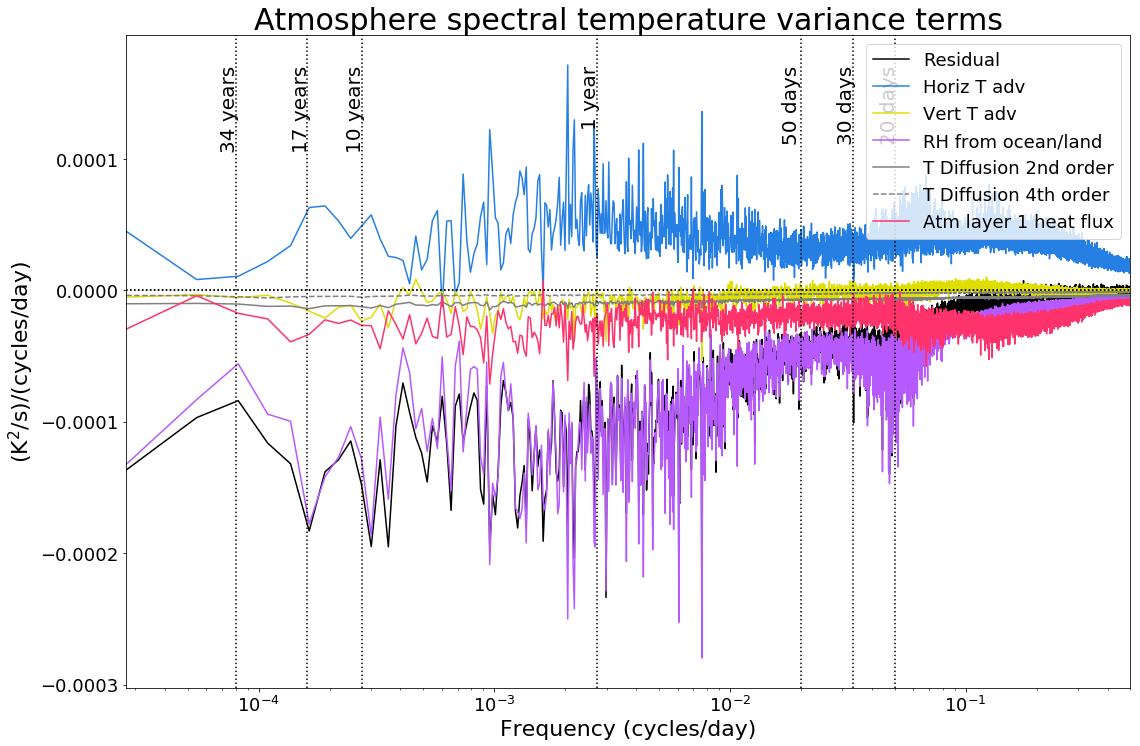

In [19]:
n = 0
vtext_loc = 1.6e-4


Tum_plot,Tvm_plot,vert_adv_plot,oc_rh,oc_rh_noLand,Fmup,F1down,Fme_plot,Tdel2T_plot,Tdel4T_plot,sum_terms,sum_terms_woOc,sum_terms_woLand = mult_const(
                                                            Tum_avg,Tvm_avg,vrt_avg,Ta2_avg,Tan_avg,Td2_avg,Td4_avg,
                                                            Tn1_avg,TTo_avg,T2o_avg,TFs_avg,slh_avg)

plt.figure(figsize=(18,12))
#plt.semilogx(w,gaussian_filter(sum_terms_woLand/dw,sigma=n),label='Residual',color='k')
#plt.semilogx(w,gaussian_filter(-sum_terms_woOc/dw,sigma=n),label='Residual',color='k')
plt.semilogx(w,gaussian_filter(sum_terms/dw,sigma=n),label='Residual',color='k')
plt.semilogx(w,gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n),label='Horiz T adv',color=KEcolor)
#plt.semilogx(w,gaussian_filter(Fmup/dw,sigma=n),label='Upward RH',color=Botcolor)
#plt.semilogx(w,gaussian_filter(F1down/dw,sigma=n),label='Downward first layer RH',color=Windcolor)
plt.semilogx(w,gaussian_filter(vert_adv_plot/dw,sigma=n),label='Vert T adv',color='#dede00')
#plt.semilogx(w,gaussian_filter(Fme_plot/dw,sigma=n),label='Entrainment heat flux',color='pink')
plt.semilogx(w,gaussian_filter(oc_rh/dw,sigma=n),label='RH from ocean/land',color=Buoycolor)
#plt.semilogx(w,gaussian_filter(oc_rh_noLand/dw,sigma=n),label='RH from ocean/land',color=Buoycolor)
plt.semilogx(w,gaussian_filter(Tdel2T_plot/dw,sigma=n),label='T Diffusion 2nd order',color='grey')
plt.semilogx(w,gaussian_filter(Tdel4T_plot/dw,sigma=n),label='T Diffusion 4th order',color='grey',linestyle='dashed')
plt.semilogx(w,gaussian_filter((Fme_plot+Fmup+F1down)/dw,sigma=n),label='Atm layer 1 heat flux',color=PEcolor)


#plt.ylim(np.min(gaussian_filter(Tvm_plot/dw,sigma=n)-2),np.max(gaussian_filter(Tum_plot/dw,sigma=n))+3)
#plt.ylim(np.min(gaussian_filter(Tdel2T_plot/dw,sigma=n)-3),np.max(gaussian_filter(Tum_plot/dw,sigma=n))+1) # for no smoothing

plot_lines()



# Plot each 100-year segment for each term

### Calculate each term

In [20]:
Tum1,Tvm1,vert_adv1,oc_rh1,oc_rh_woLand,Fmup1,F1down1,Fme1,Tdel2T1,Tdel4T1,sum_terms,sum_terms_woOc,sum_terms_woLand = mult_const(Tum_1,
                                                            Tvm_1,vrt_1,Ta2_1,Tan_1,Td2_1,Td4_1,
                                                            Tn1_1,TTo_1,T2o_1,TFs_1,slh_1)


Tum2,Tvm2,vert_adv2,oc_rh2,oc_rh_woLand,Fmup2,F1down2,Fme2,Tdel2T2,Tdel4T2,sum_terms,sum_terms_woOc,sum_terms_woLand = mult_const(Tum_2,
                                                            Tvm_2,vrt_2,Ta2_2,Tan_2,Td2_2,Td4_2,
                                                            Tn1_2,TTo_2,T2o_2,TFs_2,slh_2)


Tum3,Tvm3,vert_adv3,oc_rh3,oc_rh_woLand,Fmup3,F1down3,Fme3,Tdel2T3,Tdel4T3,sum_terms,sum_terms_woOc,sum_terms_woLand = mult_const(Tum_3,
                                                            Tvm_3,vrt_3,Ta2_3,Tan_3,Td2_3,Td4_3,
                                                            Tn1_3,TTo_3,T2o_3,TFs_3,slh_3)

### H_adv

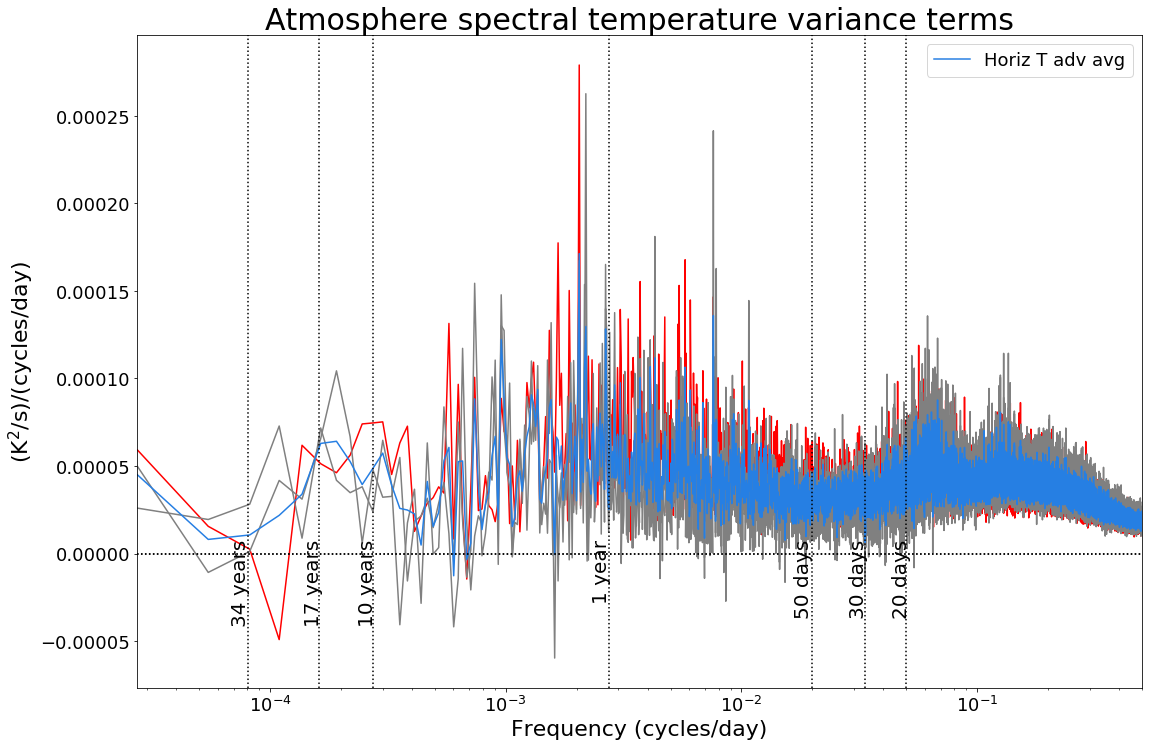

In [21]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Tum1+Tvm1)/dw,sigma=n),color='r')
plt.semilogx(w,gaussian_filter((Tum2+Tvm2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Tum3+Tvm3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n),label='Horiz T adv avg',color=KEcolor)

plot_lines()

### Vertical advection

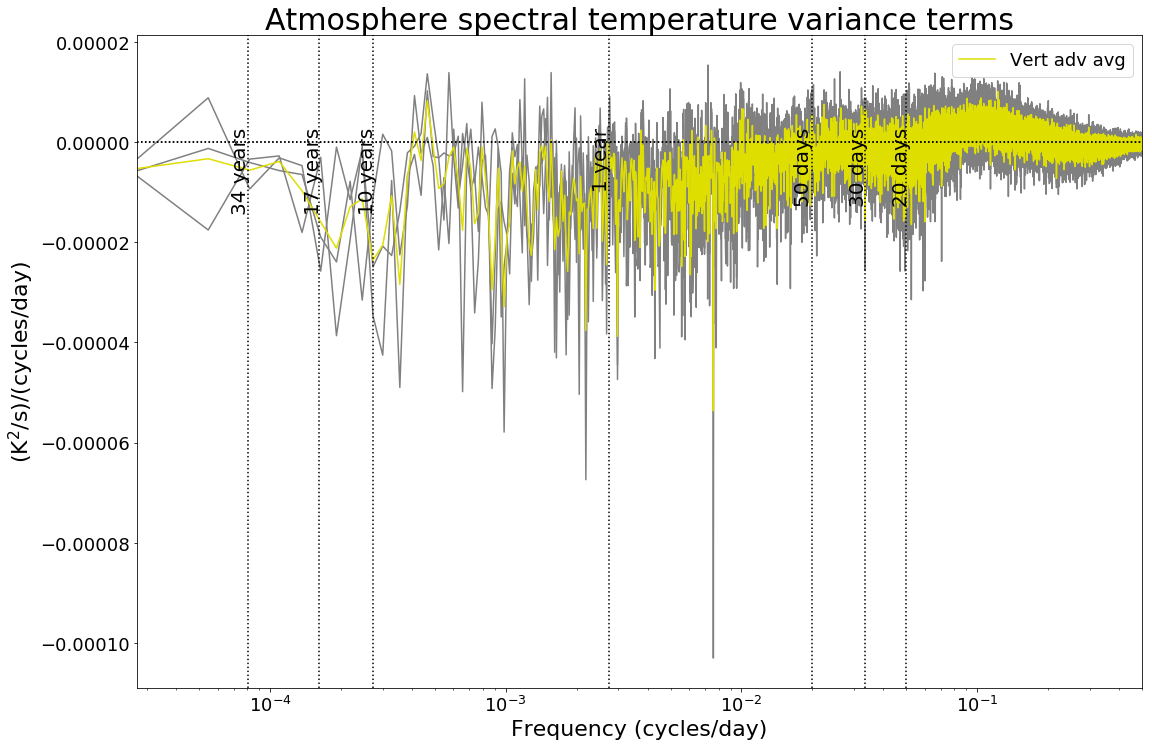

In [22]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((vert_adv1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((vert_adv2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((vert_adv3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((vert_adv_plot)/dw,sigma=n),label='Vert adv avg',color='#dede00')

plot_lines()

### Oc_rh (from over ocean)

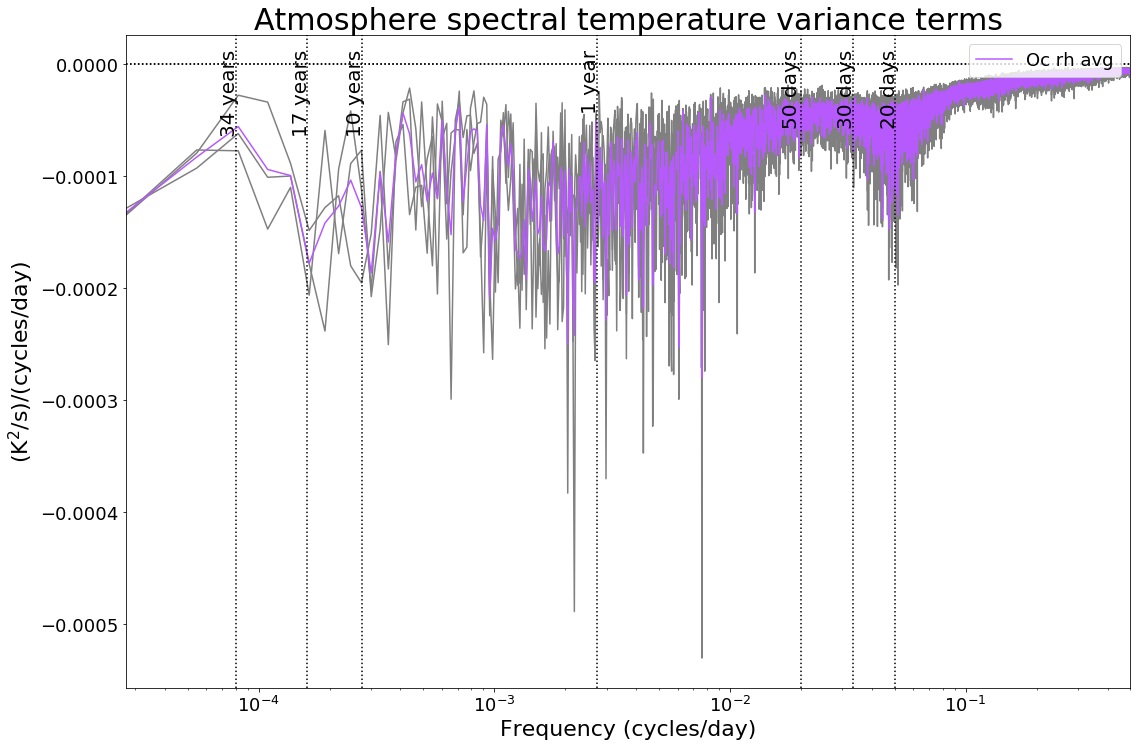

In [23]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((oc_rh1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((oc_rh2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((oc_rh3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((oc_rh)/dw,sigma=n),label='Oc rh avg',color=Buoycolor)

plot_lines()

### Fm_up

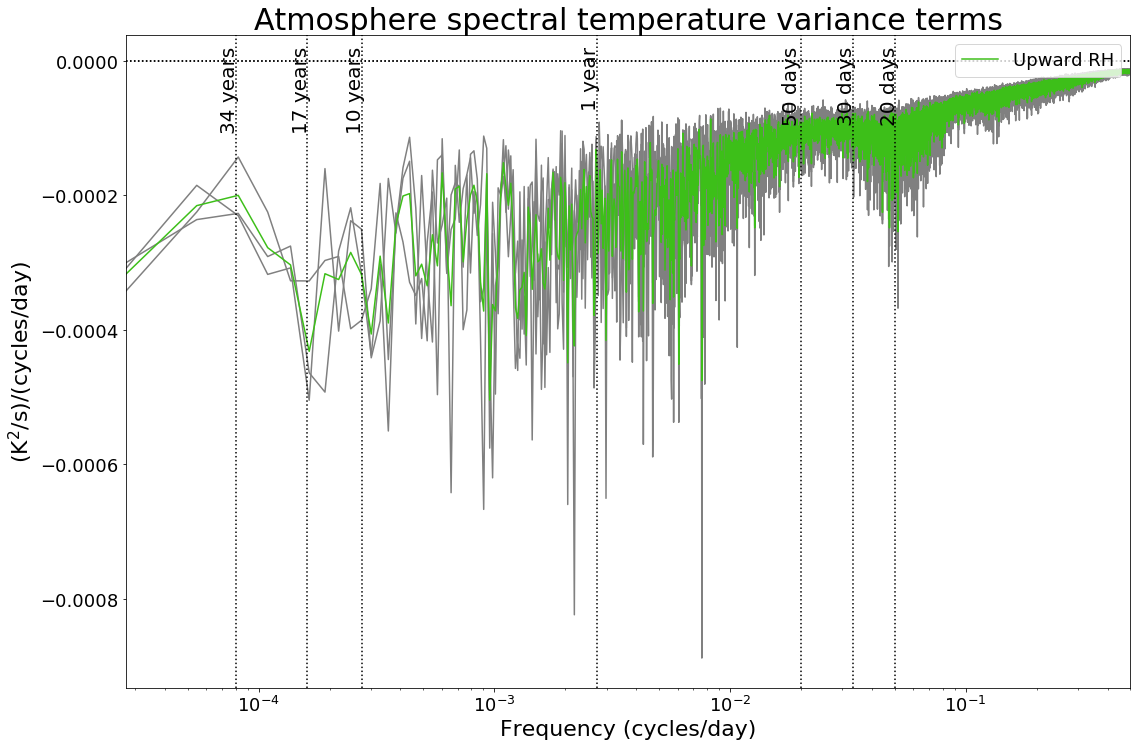

In [13]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Fmup1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fmup2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fmup3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fmup)/dw,sigma=n),label='Upward RH',color=Botcolor)

plot_lines()

### F1down

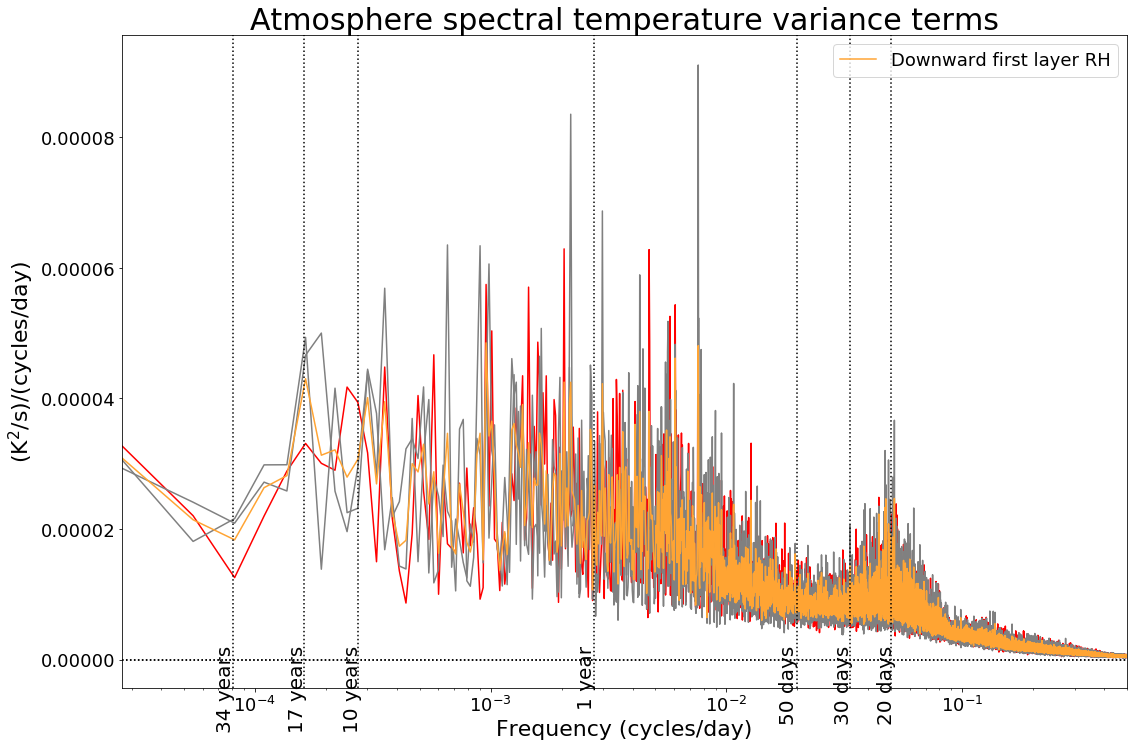

In [24]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((F1down1)/dw,sigma=n),color='r')
plt.semilogx(w,gaussian_filter((F1down2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((F1down3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((F1down)/dw,sigma=n),label='Downward first layer RH',color=Windcolor)

plot_lines()

### Fme

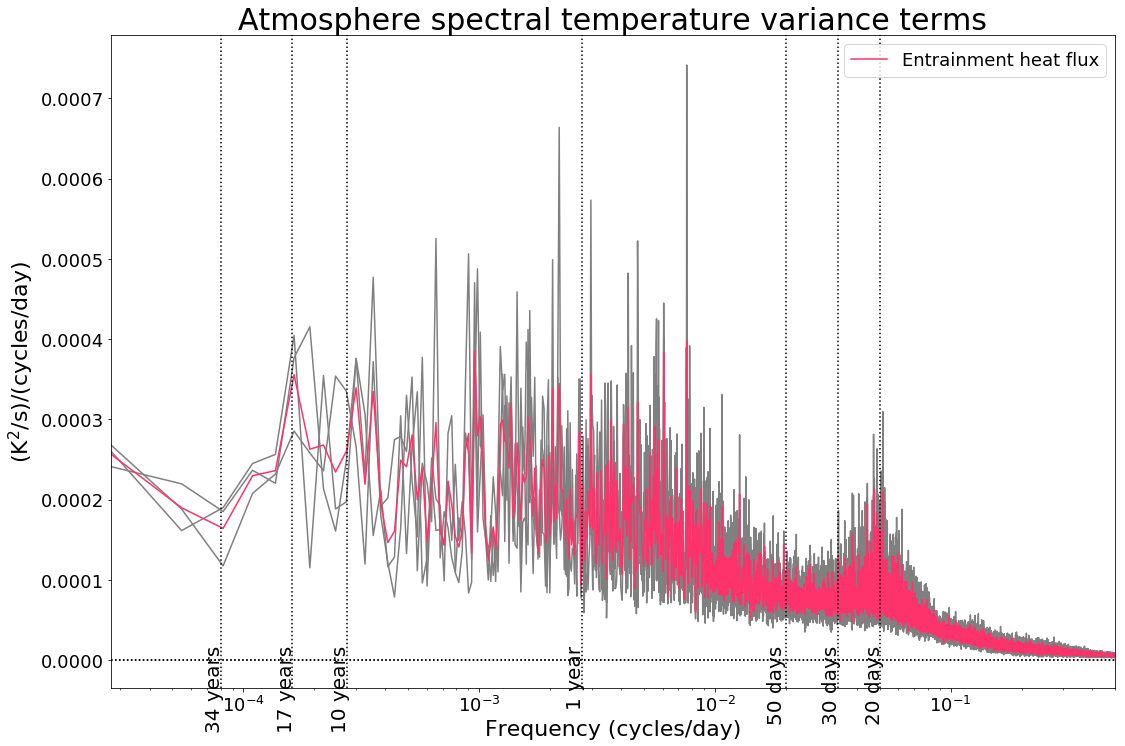

In [15]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Fme1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fme2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fme3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Fme_plot)/dw,sigma=n),label='Entrainment heat flux',color=PEcolor)

plot_lines()

### Tdel2T

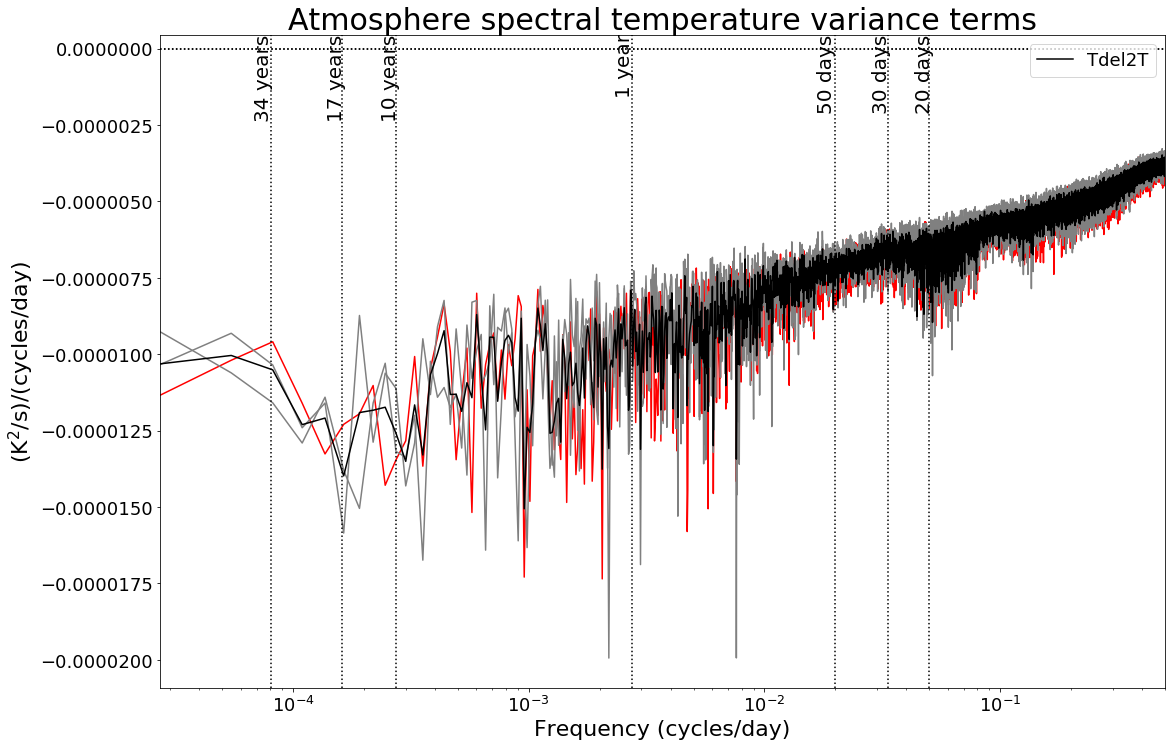

In [25]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Tdel2T1)/dw,sigma=n),color='r')
plt.semilogx(w,gaussian_filter((Tdel2T2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Tdel2T3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((Tdel2T_plot)/dw,sigma=n),label='Tdel2T',color='k')

plot_lines()

## Individually calculated terms (don't compare magnitudes with above terms!)

### Ta2o

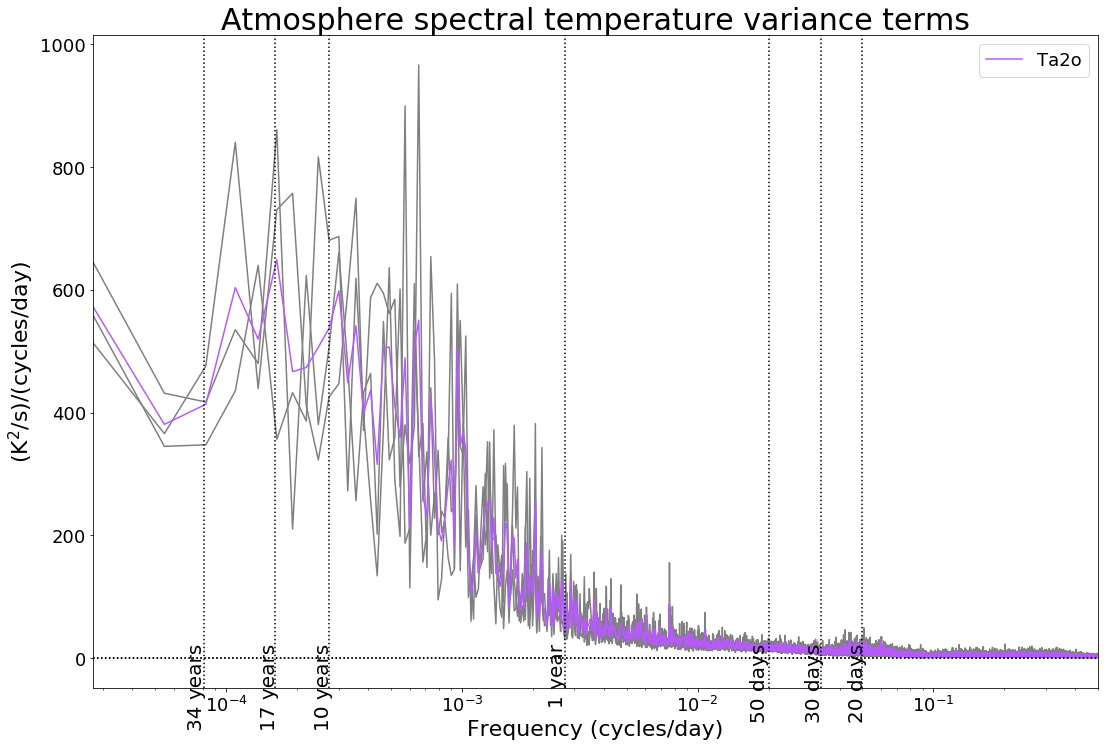

In [16]:
n = 0
vtext_loc = 0

T2o_avg = np.mean((T2o_1,T2o_2,T2o_3),axis=0)

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((T2o_1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((T2o_2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((T2o_3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter(T2o_avg/dw,sigma=n),label='Ta2o',color=Buoycolor)

plot_lines()

### TaTo

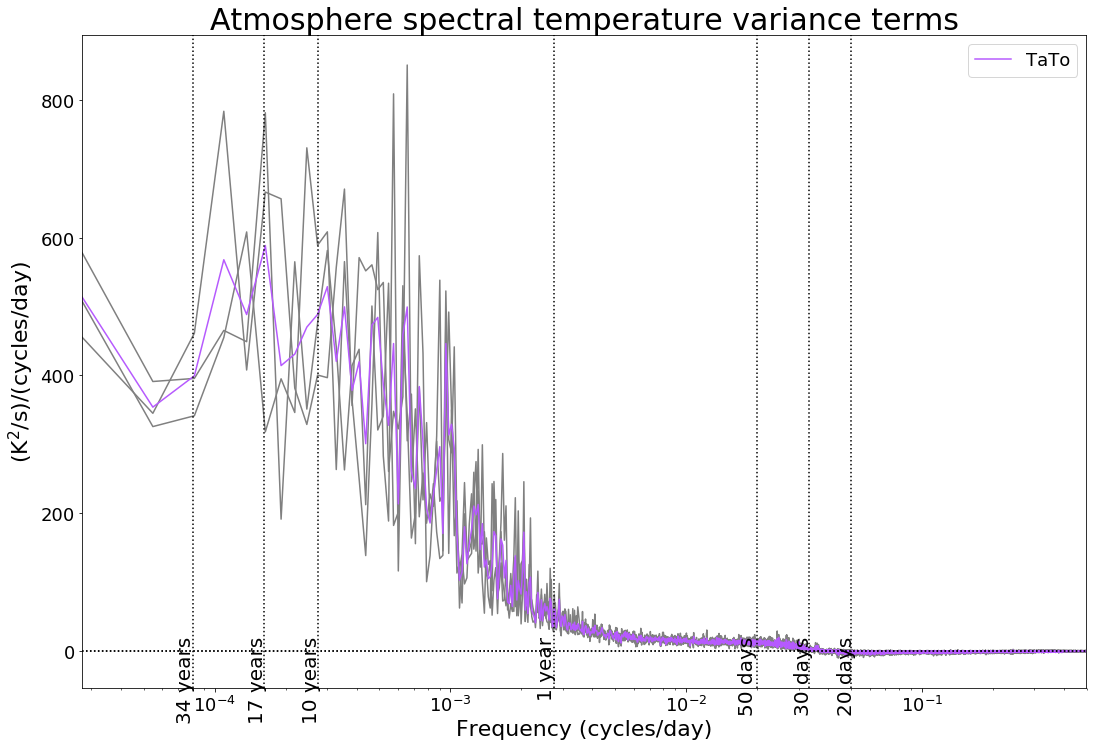

In [17]:
n = 0
vtext_loc = 0

TTo_avg = np.mean((TTo_1,TTo_2,TTo_3),axis=0)

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((TTo_1)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((TTo_2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((TTo_3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter(TTo_avg/dw,sigma=n),label='TaTo',color=Buoycolor)

plot_lines()

### TFs

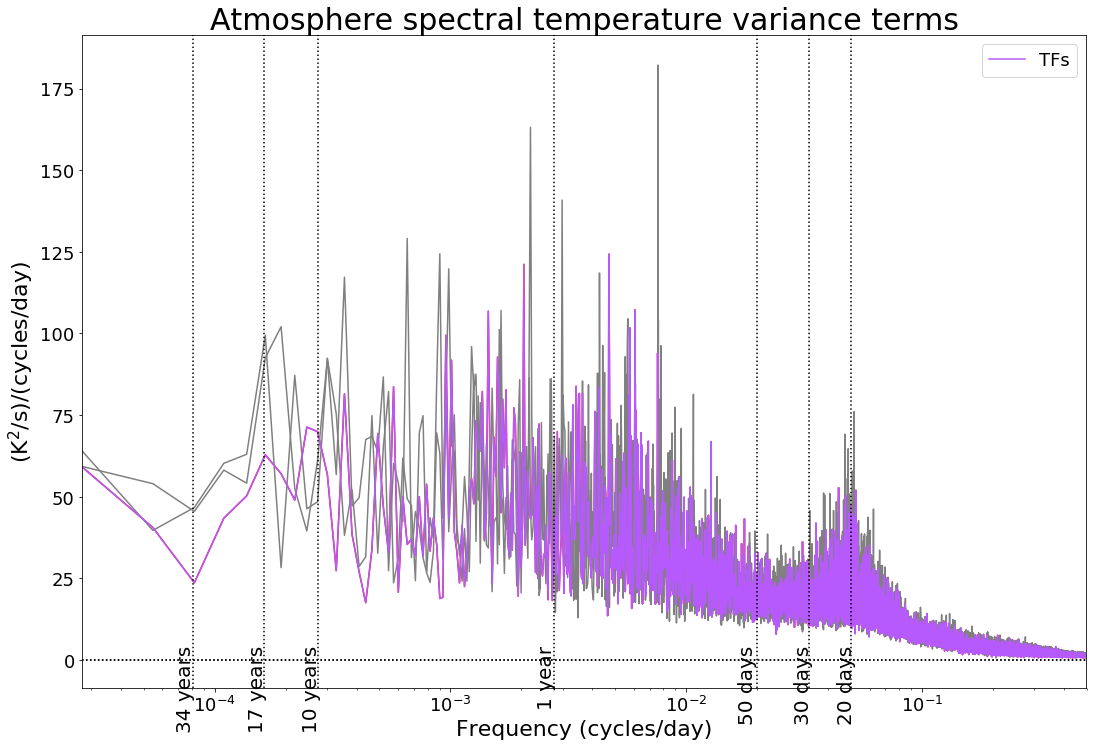

In [18]:
n = 0
vtext_loc = 0

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((TFs_1)/dw,sigma=n),color='r')
plt.semilogx(w,gaussian_filter((TFs_2)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter((TFs_3)/dw,sigma=n),color='grey')
plt.semilogx(w,gaussian_filter(TFs_avg/dw,sigma=n),label='TFs',color=Buoycolor)

plot_lines()

## Plot individual ocean/land terms

In [27]:
#oc_rh = (1/(rho*Cp)) * (Dmdown*T2o + lamda*TTo - lamda*T2o + D0up*TTo - Fs_prime*TFs) * atnorm

F_lambda = (1/(rho*Cp)) * (lamda*slh_avg) * atnorm

F_mdown = (1/(rho*Cp)) * (Dmdown*T2o_avg) * atnorm

F_0up = (1/(rho*Cp)) * (D0up*TTo_avg) * atnorm

F_land = - (1/(rho*Cp)) * (Fs_prime*TFs_avg) * atnorm

print(F_lambda.shape,F_mdown.shape,F_0up.shape,F_land.shape)

(18251,) (18251,) (18251,) (18251,)


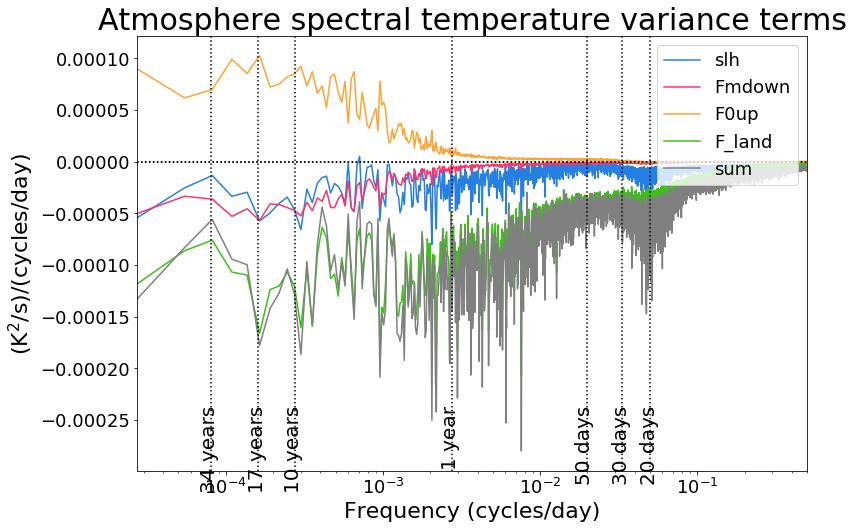

In [28]:
vtext_loc = -.00025

plt.figure(figsize=(12,8))
plt.semilogx(w,gaussian_filter((F_lambda)/dw,sigma=n),color=KEcolor,label='slh')
plt.semilogx(w,gaussian_filter((F_mdown)/dw,sigma=n),color=PEcolor,label='Fmdown')
plt.semilogx(w,gaussian_filter((F_0up)/dw,sigma=n),color=Windcolor,label='F0up')
plt.semilogx(w,gaussian_filter((F_land)/dw,sigma=n),color=Botcolor,label='F_land')

# Plot oc_rh term
plt.semilogx(w,gaussian_filter((F_lambda+F_mdown+F_0up+F_land)/dw,sigma=n),color=Rescolor,label='sum')

plot_lines()

# Compare Tana terms: calculated with h_m (#1) and with the correct eta_m (#0)

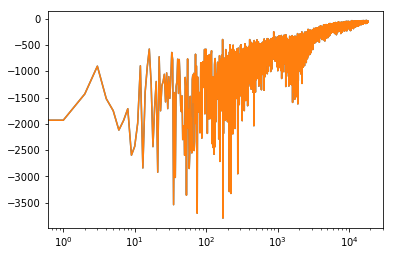

In [10]:
plt.semilogx(Tan_1)
plt.semilogx(-Tan_0)

This shows that h_m and eta_m = H_m - h_m are simply opposites of ont another. NOTE that I got the sign wrong and that eta_m = h_m - H_m, which means eta_m and h_m yield the same answer when fourier transformed.

# Compare slh versus calculating To and Ta separately

In [16]:
a1 = lamda*TTo_3 - lamda*T2o_3
    
a2 = lamda*slh_3

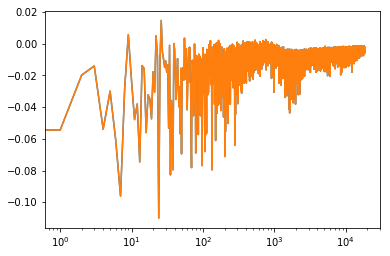

In [17]:
plt.semilogx(a1)
plt.semilogx(a2)